In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
# Load crime data set into pandas
state_economy = pd.read_csv("state_economy.csv")
state_economy.head()

,SQGDP2 Gross domestic product (GDP) by state 1/,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62
0,(Millions of current dollars),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bureau of Economic Analysis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,State or DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GeoFips,GeoName,LineCode,Description,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,...,2017:Q2,2017:Q3,2017:Q4,2018:Q1,2018:Q2,2018:Q3,2018:Q4,2019:Q1,2019:Q2,2019:Q3
4,0,United States *,1,All industry total,12761337,12910022,13142873,13332316,13603933,13749806,...,19356649,19611704,19918910,20163159,20510177,20749752,20897804,21098827,21340267,21542540


In [3]:
state_economy.columns = state_economy.iloc[3]
state_economy.head()

3,GeoFips,GeoName,LineCode,Description,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,...,2017:Q2,2017:Q3,2017:Q4,2018:Q1,2018:Q2,2018:Q3,2018:Q4,2019:Q1,2019:Q2,2019:Q3
0,(Millions of current dollars),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bureau of Economic Analysis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,State or DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GeoFips,GeoName,LineCode,Description,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,...,2017:Q2,2017:Q3,2017:Q4,2018:Q1,2018:Q2,2018:Q3,2018:Q4,2019:Q1,2019:Q2,2019:Q3
4,0,United States *,1,All industry total,12761337,12910022,13142873,13332316,13603933,13749806,...,19356649,19611704,19918910,20163159,20510177,20749752,20897804,21098827,21340267,21542540


In [4]:
df = state_economy.drop([0,1,2,3])

In [5]:
df1 = df.drop([1447,1448,1449,1450,1451])

In [6]:
df1 = df1.dropna()
df1.head(60)

3,GeoFips,GeoName,LineCode,Description,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,...,2017:Q2,2017:Q3,2017:Q4,2018:Q1,2018:Q2,2018:Q3,2018:Q4,2019:Q1,2019:Q2,2019:Q3
4,0,United States *,1,All industry total,12761337,12910022,13142873,13332316,13603933,13749806,...,19356649,19611704,19918910,20163159,20510177,20749752,20897804,21098827,21340267,21542540
5,0,United States *,2,Private industries,11077820.8,11209860.8,11423916.2,11593875.1,11845005.4,11971058.3,...,16915009,17149802,17434780,17654891,17977475,18189960,18320015,18503089,18724676,18897219
6,0,United States *,3,"Agriculture, forestry, fishing and hunting",130472.2,130667.4,128250.5,123996.9,119576.9,123277.5,...,178485,169133,169305,169446,172100,160510,163799,161084,165741,173393
7,0,United States *,6,"Mining, quarrying, and oil and gas extra...",197013.5,210279.9,232654.1,262763.6,268211,272817.2,...,277806,286628,318582,328770,346432,361288,350091,324570,331738,310758
8,0,United States *,10,Utilities,192325.6,189654.3,200008.3,210583.4,220649.8,226783,...,316793,315226,321076,322592,326273,323103,331440,331778,332671,336272
9,0,United States *,11,Construction,628497.6,643746,664197.3,670825.2,698776.4,698489.3,...,781456,793586,807546,824254,835302,845371,851643,871387,883874,890334
10,0,United States *,12,Manufacturing,1673020.7,1667801.2,1703061.7,1729883.1,1780270.9,1797640.1,...,2157123,2196235,2251478,2274772,2308125,2337156,2364714,2337619,2355032,2365492
11,0,United States *,13,Durable goods manufacturing,945528.1,946649.2,960430.9,974590.6,1004784.2,1004086.9,...,1217524,1235948,1262095,1272352,1286168,1305727,1321374,1336049,1341656,1344818
12,0,United States *,25,Nondurable goods manufacturing,727492.7,721152.1,742630.8,755292.5,775486.6,793553.2,...,939599,960287,989384,1002420,1021956,1031428,1043341,1001569,1013377,1020675
13,0,United States *,34,Wholesale trade,742767.9,745248.6,759656,772124.5,793711.5,807473.5,...,1157260,1168569,1186549,1184398,1200091,1217788,1246640,1262899,1269028,1287240


In [7]:
df1['GeoName'].value_counts()

United States *         26
Colorado                24
Virginia                24
Wyoming                 24
Texas                   24
Mideast                 24
North Carolina          24
Utah                    24
Kentucky                24
New England             24
Mississippi             24
Wisconsin               24
Nebraska                24
California              24
Oregon                  24
West Virginia           24
Maine                   24
Southwest               24
Arkansas                24
South Carolina          24
New Mexico              24
Iowa                    24
Hawaii                  24
Connecticut             24
Far West                24
South Dakota            24
North Dakota            24
Vermont                 24
Delaware                24
Southeast               24
Washington              24
Rhode Island            24
Tennessee               24
Indiana                 24
Idaho                   24
Alabama                 24
New York                24
N

In [8]:
df1 = df1[df1.GeoName != 'United States *']

In [9]:
df1 = df1[df1.GeoName != 'Far West']

In [10]:
df1 = df1[df1.GeoName != 'Rocky Mountain']

In [11]:
df1 = df1[df1.GeoName != 'Southwest']

In [12]:
df1 = df1[df1.GeoName != 'Southeast']

In [13]:
df1 = df1[df1.GeoName != 'Plains']

In [14]:
df1 = df1[df1.GeoName != 'Great Lakes']

In [15]:
df1 = df1[df1.GeoName != 'Mideast']

In [16]:
df1 = df1[df1.GeoName != 'New England']

In [17]:
df1['GeoName'].value_counts()

Colorado                24
Hawaii                  24
Oregon                  24
West Virginia           24
Maine                   24
Minnesota               24
Arkansas                24
District of Columbia    24
New Mexico              24
South Carolina          24
Iowa                    24
North Dakota            24
Alaska                  24
California              24
Pennsylvania            24
Oklahoma                24
New Jersey              24
Missouri                24
Illinois                24
Georgia                 24
Texas                   24
Maryland                24
Vermont                 24
Delaware                24
Montana                 24
Louisiana               24
Rhode Island            24
Florida                 24
Indiana                 24
Idaho                   24
Alabama                 24
New York                24
Washington              24
Nevada                  24
Arizona                 24
North Carolina          24
Massachusetts           24
U

In [18]:
df1['GeoName'].nunique()

51

In [19]:
df1 = df1[df1.LineCode != '1']

In [20]:
df1 = df1[df1.LineCode != '2']

In [21]:
df1 = df1[df1.LineCode != '13']

In [22]:
df1 = df1[df1.LineCode != '25']

In [23]:
df1.head(30)

3,GeoFips,GeoName,LineCode,Description,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,...,2017:Q2,2017:Q3,2017:Q4,2018:Q1,2018:Q2,2018:Q3,2018:Q4,2019:Q1,2019:Q2,2019:Q3
33,1000,Alabama,3,"Agriculture, forestry, fishing and hunting",2659.8,2643.4,2600.6,2617.7,1968.9,2090.1,...,2392.5,2202,2232.9,2359.5,2380,2117.7,2243.8,1878.1,1942.7,2029.6
34,1000,Alabama,6,"Mining, quarrying, and oil and gas extra...",2421.4,2645.8,2783.3,3137.7,2939.1,2841.3,...,2758.9,2804.8,3129.6,3056.7,2964.5,3032.7,2975.3,2679.9,2755.2,2581.4
35,1000,Alabama,10,Utilities,3586.6,3730,4008.8,3970.7,4397.9,4284,...,5791.5,6367,6507.8,6357.9,6213.4,6554,6837.1,7057.4,7071.8,7155.6
36,1000,Alabama,11,Construction,7434.9,7605.6,7750.8,8116.4,8353.5,8522.5,...,7202.2,7343.4,7377.4,7563.8,7743.6,7961.2,8117.7,8246.8,8420.5,8432.5
37,1000,Alabama,12,Manufacturing,27768.3,27502.5,27802.5,28958.5,29575.7,29958.5,...,34687.5,35565,36491.1,37034.7,37101.5,37950.3,38382.1,38350.4,38618.4,38714.4
40,1000,Alabama,34,Wholesale trade,8747.9,8831.8,8989,9302.1,9346.4,9466.8,...,11944.8,12037.9,12038.1,12107.9,12215,12377.8,12714.5,12817.8,12789.5,12974.8
41,1000,Alabama,35,Retail trade,11560.6,11765.1,11759.7,12142,12282.9,12332.8,...,14074.2,14185.9,14423.9,14796.8,15324.3,15470.4,15596.1,15916.1,16014.8,16341.9
42,1000,Alabama,36,Transportation and warehousing,3928.7,4110.2,4229.4,4387.7,4455.4,4504.6,...,5639.2,5700.2,5821.8,5979.1,6080.9,6191.1,6367,6385.1,6370.4,6385.2
43,1000,Alabama,45,Information,5159,5300.2,5177.5,5111.5,5236.7,5339.2,...,4642.9,4720,4735.1,4594.2,4805.7,4887.4,4857.6,5171.3,5220.3,5280.3
44,1000,Alabama,51,Finance and insurance,9712.1,10116.7,9507.2,9393.2,9094.6,9107.1,...,11783.3,11974,12447.6,12790.9,13382.7,13476.9,13144.3,13422,13693.4,13640.4


In [24]:
df1['2005:Q1'].value_counts()

(D)        4
2490.4     2
674.7      2
3586.6     2
483.6      2
          ..
955        1
19920.3    1
7757.9     1
1352.5     1
1379.3     1
Name: 2005:Q1, Length: 1010, dtype: int64

In [25]:
df1.loc[df1['2005:Q1'] == '(D)']

3,GeoFips,GeoName,LineCode,Description,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,...,2017:Q2,2017:Q3,2017:Q4,2018:Q1,2018:Q2,2018:Q3,2018:Q4,2019:Q1,2019:Q2,2019:Q3
202,10000,Delaware,6,"Mining, quarrying, and oil and gas extra...",(D),(D),(D),(D),1.4,1.5,...,(D),(D),(D),(D),(D),(D),(D),(D),(D),(D)
204,10000,Delaware,11,Construction,(D),(D),(D),(D),2602.2,2524.8,...,2654,2666.8,2727.5,2693.1,2766.8,2811.4,2858.9,2953.1,2986.4,3002.6
226,11000,District of Columbia,6,"Mining, quarrying, and oil and gas extra...",(D),(D),(D),(D),0,0,...,0,0,0,0,0,0,0,0,0,0
228,11000,District of Columbia,11,Construction,(D),(D),(D),(D),1016.5,1126.1,...,(D),(D),(D),1646.4,1646.5,1642.6,1643.8,1588.4,1612.9,1608.4


In [26]:
df1 = df1.replace('(D)', 0)

In [27]:
df1 = df1.astype({'2005:Q1':'float32',
                 '2005:Q2':'float32',
                 '2005:Q3':'float32',
                 '2005:Q4':'float32',
                 '2006:Q1':'float32',
                 '2006:Q2':'float32',
                 '2006:Q3':'float32',
                 '2006:Q4':'float32',
                 '2007:Q1':'float32',
                 '2007:Q2':'float32',
                 '2007:Q3':'float32',
                 '2007:Q4':'float32',
                  '2008:Q1':'float32',
                  '2008:Q2':'float32',
                  '2008:Q3':'float32',
                  '2008:Q4':'float32',
                  '2009:Q1':'float32',
                  '2009:Q2':'float32',
                  '2009:Q3':'float32',
                  '2009:Q4':'float32',
                  '2010:Q1':'float32',
                  '2010:Q2':'float32',
                  '2010:Q3':'float32',
                  '2010:Q4':'float32',
                  '2011:Q1':'float32',
                  '2011:Q2':'float32',
                  '2011:Q3':'float32',
                  '2011:Q4':'float32',
                  '2012:Q1':'float32',
                  '2012:Q2':'float32',
                  '2012:Q3':'float32',
                  '2012:Q4':'float32',
                  '2013:Q1':'float32',
                  '2013:Q2':'float32',
                  '2013:Q3':'float32',
                  '2013:Q4':'float32',
                  '2014:Q1':'float32',
                  '2014:Q2':'float32',
                  '2014:Q3':'float32',
                  '2014:Q4':'float32',
                  '2015:Q1':'float32',
                  '2015:Q2':'float32',
                  '2015:Q3':'float32',
                  '2015:Q4':'float32',
                  '2016:Q1':'float32',
                  '2016:Q2':'float32',
                  '2016:Q3':'float32',
                  '2016:Q4':'float32',
                  '2017:Q1':'float32',
                  '2017:Q2':'float32',
                  '2017:Q3':'float32',
                  '2017:Q4':'float32',
                  '2018:Q1':'float32',
                  '2018:Q2':'float32',
                  '2018:Q3':'float32',
                  '2018:Q4':'float32',
                  '2019:Q1':'float32',
                  '2019:Q2':'float32',
                  '2019:Q3':'float32'
                 })
df1

3,GeoFips,GeoName,LineCode,Description,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,...,2017:Q2,2017:Q3,2017:Q4,2018:Q1,2018:Q2,2018:Q3,2018:Q4,2019:Q1,2019:Q2,2019:Q3
33,1000,Alabama,3,"Agriculture, forestry, fishing and hunting",2659.800049,2643.399902,2600.600098,2617.699951,1968.900024,2090.100098,...,2392.500000,2202.000000,2232.899902,2359.500000,2380.000000,2117.699951,2243.800049,1878.099976,1942.699951,2029.599976
34,1000,Alabama,6,"Mining, quarrying, and oil and gas extra...",2421.399902,2645.800049,2783.300049,3137.699951,2939.100098,2841.300049,...,2758.899902,2804.800049,3129.600098,3056.699951,2964.500000,3032.699951,2975.300049,2679.899902,2755.199951,2581.399902
35,1000,Alabama,10,Utilities,3586.600098,3730.000000,4008.800049,3970.699951,4397.899902,4284.000000,...,5791.500000,6367.000000,6507.799805,6357.899902,6213.399902,6554.000000,6837.100098,7057.399902,7071.799805,7155.600098
36,1000,Alabama,11,Construction,7434.899902,7605.600098,7750.799805,8116.399902,8353.500000,8522.500000,...,7202.200195,7343.399902,7377.399902,7563.799805,7743.600098,7961.200195,8117.700195,8246.799805,8420.500000,8432.500000
37,1000,Alabama,12,Manufacturing,27768.300781,27502.500000,27802.500000,28958.500000,29575.699219,29958.500000,...,34687.500000,35565.000000,36491.101562,37034.699219,37101.500000,37950.300781,38382.101562,38350.398438,38618.398438,38714.398438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,56000,Wyoming,70,Health care and social assistance,1007.500000,996.099976,1004.900024,1041.300049,1060.500000,1077.900024,...,1646.400024,1680.099976,1673.400024,1739.500000,1736.800049,1752.199951,1763.300049,1776.199951,1781.300049,1797.800049
1251,56000,Wyoming,76,"Arts, entertainment, and recreation",131.800003,145.199997,152.399994,155.699997,175.899994,162.199997,...,272.299988,281.600006,274.299988,276.299988,289.299988,293.500000,290.500000,282.700012,278.200012,284.100006
1252,56000,Wyoming,79,Accommodation and food services,833.200012,802.200012,798.299988,824.000000,927.599976,931.400024,...,1355.599976,1380.500000,1388.699951,1428.000000,1448.199951,1468.300049,1484.699951,1534.500000,1546.699951,1585.099976
1253,56000,Wyoming,82,Other services (except government and go...,455.200012,448.600006,464.299988,478.200012,524.900024,547.900024,...,578.000000,592.900024,600.099976,614.400024,619.400024,624.599976,643.599976,643.900024,652.700012,665.700012


In [28]:
df1['2005'] = df1['2005:Q1'] + df1['2005:Q2'] + df1['2005:Q3'] + df1['2005:Q4']
df1['2006'] = df1['2006:Q1'] + df1['2006:Q2'] + df1['2006:Q3'] + df1['2006:Q4']
df1['2007'] = df1['2007:Q1'] + df1['2007:Q2'] + df1['2007:Q3'] + df1['2007:Q4']
df1['2008'] = df1['2008:Q1'] + df1['2008:Q2'] + df1['2008:Q3'] + df1['2008:Q4']
df1['2009'] = df1['2009:Q1'] + df1['2009:Q2'] + df1['2009:Q3'] + df1['2009:Q4']
df1['2010'] = df1['2010:Q1'] + df1['2010:Q2'] + df1['2010:Q3'] + df1['2010:Q4']
df1['2011'] = df1['2011:Q1'] + df1['2011:Q2'] + df1['2011:Q3'] + df1['2011:Q4']
df1['2012'] = df1['2012:Q1'] + df1['2012:Q2'] + df1['2012:Q3'] + df1['2012:Q4']
df1['2013'] = df1['2013:Q1'] + df1['2013:Q2'] + df1['2013:Q3'] + df1['2013:Q4']
df1['2014'] = df1['2014:Q1'] + df1['2014:Q2'] + df1['2014:Q3'] + df1['2014:Q4']
df1['2015'] = df1['2015:Q1'] + df1['2015:Q2'] + df1['2015:Q3'] + df1['2015:Q4']
df1['2016'] = df1['2016:Q1'] + df1['2016:Q2'] + df1['2016:Q3'] + df1['2016:Q4']
df1['2017'] = df1['2017:Q1'] + df1['2017:Q2'] + df1['2017:Q3'] + df1['2017:Q4']
df1['2018'] = df1['2018:Q1'] + df1['2018:Q2'] + df1['2018:Q3'] + df1['2018:Q4']
df1['2019'] = df1['2019:Q1'] + df1['2019:Q2'] + df1['2019:Q3']

In [29]:
df1.head(20)

3,GeoFips,GeoName,LineCode,Description,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
33,1000,Alabama,3,"Agriculture, forestry, fishing and hunting",2659.800049,2643.399902,2600.600098,2617.699951,1968.900024,2090.100098,...,7713.400391,6364.099609,7208.699707,12454.799805,10074.700195,10244.400391,7915.500000,9233.699219,9101.000000,5850.399902
34,1000,Alabama,6,"Mining, quarrying, and oil and gas extra...",2421.399902,2645.800049,2783.300049,3137.699951,2939.100098,2841.300049,...,12138.000000,11797.799805,11567.299805,11042.400391,10099.500000,9668.500000,6899.399902,11135.599609,12029.200195,8016.499512
35,1000,Alabama,10,Utilities,3586.600098,3730.000000,4008.800049,3970.699951,4397.899902,4284.000000,...,22335.701172,23283.300781,22757.400391,22721.300781,23443.800781,24011.101562,24801.201172,24617.699219,25962.400391,21284.798828
36,1000,Alabama,11,Construction,7434.899902,7605.600098,7750.799805,8116.399902,8353.500000,8522.500000,...,27237.902344,26460.300781,27514.500000,26857.701172,26702.800781,27193.300781,28753.898438,29499.500000,31386.300781,25099.800781
37,1000,Alabama,12,Manufacturing,27768.300781,27502.500000,27802.500000,28958.500000,29575.699219,29958.500000,...,109693.093750,125126.109375,127687.296875,134471.000000,133129.000000,133478.500000,137380.500000,141561.703125,150468.593750,115683.195312
40,1000,Alabama,34,Wholesale trade,8747.900391,8831.799805,8989.000000,9302.099609,9346.400391,9466.799805,...,40559.500000,41477.300781,42415.800781,44353.800781,45034.300781,45895.402344,47248.601562,47910.703125,49415.199219,38582.101562
41,1000,Alabama,35,Retail trade,11560.599609,11765.099609,11759.700195,12142.000000,12282.900391,12332.799805,...,47848.902344,48563.601562,50201.695312,51437.296875,51898.800781,54086.703125,56250.101562,56740.398438,61187.601562,48272.796875
42,1000,Alabama,36,Transportation and warehousing,3928.699951,4110.200195,4229.399902,4387.700195,4455.399902,4504.600098,...,18692.800781,19248.500000,19209.500000,19299.898438,19970.300781,20850.900391,21333.599609,22815.300781,24618.099609,19140.699219
43,1000,Alabama,45,Information,5159.000000,5300.200195,5177.500000,5111.500000,5236.700195,5339.200195,...,18351.300781,17927.400391,17009.500000,17860.800781,17614.101562,18635.500000,18526.000000,18671.000000,19144.900391,15671.899414
44,1000,Alabama,51,Finance and insurance,9712.099609,10116.700195,9507.200195,9393.200195,9094.599609,9107.099609,...,33487.500000,32361.199219,40879.000000,41363.601562,46472.898438,49121.601562,46516.000000,47781.500000,52794.800781,40755.800781


In [30]:
df1.reset_index()

3,index,GeoFips,GeoName,LineCode,Description,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,33,1000,Alabama,3,"Agriculture, forestry, fishing and hunting",2659.800049,2643.399902,2600.600098,2617.699951,1968.900024,...,7713.400391,6364.099609,7208.699707,12454.799805,10074.700195,10244.400391,7915.500000,9233.699219,9101.000000,5850.399902
1,34,1000,Alabama,6,"Mining, quarrying, and oil and gas extra...",2421.399902,2645.800049,2783.300049,3137.699951,2939.100098,...,12138.000000,11797.799805,11567.299805,11042.400391,10099.500000,9668.500000,6899.399902,11135.599609,12029.200195,8016.499512
2,35,1000,Alabama,10,Utilities,3586.600098,3730.000000,4008.800049,3970.699951,4397.899902,...,22335.701172,23283.300781,22757.400391,22721.300781,23443.800781,24011.101562,24801.201172,24617.699219,25962.400391,21284.798828
3,36,1000,Alabama,11,Construction,7434.899902,7605.600098,7750.799805,8116.399902,8353.500000,...,27237.902344,26460.300781,27514.500000,26857.701172,26702.800781,27193.300781,28753.898438,29499.500000,31386.300781,25099.800781
4,37,1000,Alabama,12,Manufacturing,27768.300781,27502.500000,27802.500000,28958.500000,29575.699219,...,109693.093750,125126.109375,127687.296875,134471.000000,133129.000000,133478.500000,137380.500000,141561.703125,150468.593750,115683.195312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1250,56000,Wyoming,70,Health care and social assistance,1007.500000,996.099976,1004.900024,1041.300049,1060.500000,...,5844.000000,5993.399902,6234.099609,6272.400391,6325.399414,6472.600098,6599.500000,6662.500000,6991.799805,5355.299805
1016,1251,56000,Wyoming,76,"Arts, entertainment, and recreation",131.800003,145.199997,152.399994,155.699997,175.899994,...,867.500000,928.099976,1020.400024,989.199951,1109.000000,1046.000000,1049.300049,1094.000000,1149.599976,845.000000
1017,1252,56000,Wyoming,79,Accommodation and food services,833.200012,802.200012,798.299988,824.000000,927.599976,...,3984.600098,4226.799805,4553.200195,4696.300293,4801.400391,5246.799805,5197.199707,5421.099609,5829.200195,4666.299805
1018,1253,56000,Wyoming,82,Other services (except government and go...,455.200012,448.600006,464.299988,478.200012,524.900024,...,2400.299805,2439.000000,2572.799805,2507.100098,2436.500000,2453.000000,2331.300049,2346.899902,2502.000000,1962.300049


In [31]:
df1 = df1.rename(columns={'GeoName':'State'})
df1 = df1.rename(columns={'Description':'Industry'})

In [32]:
df1 = df1.drop(columns=['GeoFips','LineCode'])
df1

3,State,Industry,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,2006:Q3,2006:Q4,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
33,Alabama,"Agriculture, forestry, fishing and hunting",2659.800049,2643.399902,2600.600098,2617.699951,1968.900024,2090.100098,2179.100098,2160.800049,...,7713.400391,6364.099609,7208.699707,12454.799805,10074.700195,10244.400391,7915.500000,9233.699219,9101.000000,5850.399902
34,Alabama,"Mining, quarrying, and oil and gas extra...",2421.399902,2645.800049,2783.300049,3137.699951,2939.100098,2841.300049,2901.800049,2899.000000,...,12138.000000,11797.799805,11567.299805,11042.400391,10099.500000,9668.500000,6899.399902,11135.599609,12029.200195,8016.499512
35,Alabama,Utilities,3586.600098,3730.000000,4008.800049,3970.699951,4397.899902,4284.000000,4522.200195,4311.200195,...,22335.701172,23283.300781,22757.400391,22721.300781,23443.800781,24011.101562,24801.201172,24617.699219,25962.400391,21284.798828
36,Alabama,Construction,7434.899902,7605.600098,7750.799805,8116.399902,8353.500000,8522.500000,8524.200195,8478.400391,...,27237.902344,26460.300781,27514.500000,26857.701172,26702.800781,27193.300781,28753.898438,29499.500000,31386.300781,25099.800781
37,Alabama,Manufacturing,27768.300781,27502.500000,27802.500000,28958.500000,29575.699219,29958.500000,29539.400391,28979.099609,...,109693.093750,125126.109375,127687.296875,134471.000000,133129.000000,133478.500000,137380.500000,141561.703125,150468.593750,115683.195312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,Wyoming,Health care and social assistance,1007.500000,996.099976,1004.900024,1041.300049,1060.500000,1077.900024,1108.699951,1123.300049,...,5844.000000,5993.399902,6234.099609,6272.400391,6325.399414,6472.600098,6599.500000,6662.500000,6991.799805,5355.299805
1251,Wyoming,"Arts, entertainment, and recreation",131.800003,145.199997,152.399994,155.699997,175.899994,162.199997,158.699997,158.699997,...,867.500000,928.099976,1020.400024,989.199951,1109.000000,1046.000000,1049.300049,1094.000000,1149.599976,845.000000
1252,Wyoming,Accommodation and food services,833.200012,802.200012,798.299988,824.000000,927.599976,931.400024,1229.300049,969.700012,...,3984.600098,4226.799805,4553.200195,4696.300293,4801.400391,5246.799805,5197.199707,5421.099609,5829.200195,4666.299805
1253,Wyoming,Other services (except government and go...,455.200012,448.600006,464.299988,478.200012,524.900024,547.900024,557.599976,578.599976,...,2400.299805,2439.000000,2572.799805,2507.100098,2436.500000,2453.000000,2331.300049,2346.899902,2502.000000,1962.300049


In [33]:
df1


3,State,Industry,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,2006:Q3,2006:Q4,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
33,Alabama,"Agriculture, forestry, fishing and hunting",2659.800049,2643.399902,2600.600098,2617.699951,1968.900024,2090.100098,2179.100098,2160.800049,...,7713.400391,6364.099609,7208.699707,12454.799805,10074.700195,10244.400391,7915.500000,9233.699219,9101.000000,5850.399902
34,Alabama,"Mining, quarrying, and oil and gas extra...",2421.399902,2645.800049,2783.300049,3137.699951,2939.100098,2841.300049,2901.800049,2899.000000,...,12138.000000,11797.799805,11567.299805,11042.400391,10099.500000,9668.500000,6899.399902,11135.599609,12029.200195,8016.499512
35,Alabama,Utilities,3586.600098,3730.000000,4008.800049,3970.699951,4397.899902,4284.000000,4522.200195,4311.200195,...,22335.701172,23283.300781,22757.400391,22721.300781,23443.800781,24011.101562,24801.201172,24617.699219,25962.400391,21284.798828
36,Alabama,Construction,7434.899902,7605.600098,7750.799805,8116.399902,8353.500000,8522.500000,8524.200195,8478.400391,...,27237.902344,26460.300781,27514.500000,26857.701172,26702.800781,27193.300781,28753.898438,29499.500000,31386.300781,25099.800781
37,Alabama,Manufacturing,27768.300781,27502.500000,27802.500000,28958.500000,29575.699219,29958.500000,29539.400391,28979.099609,...,109693.093750,125126.109375,127687.296875,134471.000000,133129.000000,133478.500000,137380.500000,141561.703125,150468.593750,115683.195312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,Wyoming,Health care and social assistance,1007.500000,996.099976,1004.900024,1041.300049,1060.500000,1077.900024,1108.699951,1123.300049,...,5844.000000,5993.399902,6234.099609,6272.400391,6325.399414,6472.600098,6599.500000,6662.500000,6991.799805,5355.299805
1251,Wyoming,"Arts, entertainment, and recreation",131.800003,145.199997,152.399994,155.699997,175.899994,162.199997,158.699997,158.699997,...,867.500000,928.099976,1020.400024,989.199951,1109.000000,1046.000000,1049.300049,1094.000000,1149.599976,845.000000
1252,Wyoming,Accommodation and food services,833.200012,802.200012,798.299988,824.000000,927.599976,931.400024,1229.300049,969.700012,...,3984.600098,4226.799805,4553.200195,4696.300293,4801.400391,5246.799805,5197.199707,5421.099609,5829.200195,4666.299805
1253,Wyoming,Other services (except government and go...,455.200012,448.600006,464.299988,478.200012,524.900024,547.900024,557.599976,578.599976,...,2400.299805,2439.000000,2572.799805,2507.100098,2436.500000,2453.000000,2331.300049,2346.899902,2502.000000,1962.300049


In [34]:
df1.drop(df1.iloc[:, 2:61], inplace = True, axis = 1)

In [35]:
df1.head(20)

3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
33,Alabama,"Agriculture, forestry, fishing and hunting",10521.500000,8398.900391,7777.200195,7579.800293,7663.899902,7713.400391,6364.099609,7208.699707,12454.799805,10074.700195,10244.400391,7915.500000,9233.699219,9101.000000,5850.399902
34,Alabama,"Mining, quarrying, and oil and gas extra...",10988.200195,11581.200195,13727.900391,15396.199219,11279.199219,12138.000000,11797.799805,11567.299805,11042.400391,10099.500000,9668.500000,6899.399902,11135.599609,12029.200195,8016.499512
35,Alabama,Utilities,15296.100586,17515.300781,18298.000000,18877.400391,20209.898438,22335.701172,23283.300781,22757.400391,22721.300781,23443.800781,24011.101562,24801.201172,24617.699219,25962.400391,21284.798828
36,Alabama,Construction,30907.701172,33878.601562,36662.699219,33471.699219,29647.398438,27237.902344,26460.300781,27514.500000,26857.701172,26702.800781,27193.300781,28753.898438,29499.500000,31386.300781,25099.800781
37,Alabama,Manufacturing,112031.796875,118052.703125,116161.296875,116017.296875,101003.406250,109693.093750,125126.109375,127687.296875,134471.000000,133129.000000,133478.500000,137380.500000,141561.703125,150468.593750,115683.195312
40,Alabama,Wholesale trade,35870.796875,38170.796875,39599.902344,41517.000000,39171.500000,40559.500000,41477.300781,42415.800781,44353.800781,45034.300781,45895.402344,47248.601562,47910.703125,49415.199219,38582.101562
41,Alabama,Retail trade,47227.398438,49175.199219,49567.402344,48559.199219,47073.699219,47848.902344,48563.601562,50201.695312,51437.296875,51898.800781,54086.703125,56250.101562,56740.398438,61187.601562,48272.796875
42,Alabama,Transportation and warehousing,16656.000000,18073.500000,18215.400391,19105.300781,17627.000000,18692.800781,19248.500000,19209.500000,19299.898438,19970.300781,20850.900391,21333.599609,22815.300781,24618.099609,19140.699219
43,Alabama,Information,20748.199219,21036.500000,19665.000000,20212.699219,18719.500000,18351.300781,17927.400391,17009.500000,17860.800781,17614.101562,18635.500000,18526.000000,18671.000000,19144.900391,15671.899414
44,Alabama,Finance and insurance,38729.199219,37164.199219,36319.000000,31565.101562,31662.298828,33487.500000,32361.199219,40879.000000,41363.601562,46472.898438,49121.601562,46516.000000,47781.500000,52794.800781,40755.800781


In [36]:
df1 = df1.round()
df1

3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
33,Alabama,"Agriculture, forestry, fishing and hunting",10522.0,8399.0,7777.0,7580.0,7664.0,7713.0,6364.0,7209.0,12455.0,10075.0,10244.0,7916.0,9234.0,9101.0,5850.0
34,Alabama,"Mining, quarrying, and oil and gas extra...",10988.0,11581.0,13728.0,15396.0,11279.0,12138.0,11798.0,11567.0,11042.0,10100.0,9668.0,6899.0,11136.0,12029.0,8016.0
35,Alabama,Utilities,15296.0,17515.0,18298.0,18877.0,20210.0,22336.0,23283.0,22757.0,22721.0,23444.0,24011.0,24801.0,24618.0,25962.0,21285.0
36,Alabama,Construction,30908.0,33879.0,36663.0,33472.0,29647.0,27238.0,26460.0,27514.0,26858.0,26703.0,27193.0,28754.0,29500.0,31386.0,25100.0
37,Alabama,Manufacturing,112032.0,118053.0,116161.0,116017.0,101003.0,109693.0,125126.0,127687.0,134471.0,133129.0,133478.0,137380.0,141562.0,150469.0,115683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,Wyoming,Health care and social assistance,4050.0,4370.0,4732.0,5343.0,5605.0,5844.0,5993.0,6234.0,6272.0,6325.0,6473.0,6600.0,6662.0,6992.0,5355.0
1251,Wyoming,"Arts, entertainment, and recreation",585.0,656.0,729.0,769.0,791.0,868.0,928.0,1020.0,989.0,1109.0,1046.0,1049.0,1094.0,1150.0,845.0
1252,Wyoming,Accommodation and food services,3258.0,4058.0,4106.0,4280.0,4066.0,3985.0,4227.0,4553.0,4696.0,4801.0,5247.0,5197.0,5421.0,5829.0,4666.0
1253,Wyoming,Other services (except government and go...,1846.0,2209.0,2442.0,2434.0,2385.0,2400.0,2439.0,2573.0,2507.0,2436.0,2453.0,2331.0,2347.0,2502.0,1962.0


In [37]:
clean_abs_df = df1.astype({
    '2005':'int32',
    '2006':'int32',
    '2007':'int32',
    '2008':'int32',
    '2009':'int32',
    '2010':'int32',
    '2011':'int32',
    '2012':'int32',
    '2013':'int32',
    '2014':'int32',
    '2015':'int32',
    '2016':'int32',
    '2017':'int32',
    '2018':'int32',
    '2019':'int32',
})

In [38]:
clean_abs_df['Industry'] = clean_abs_df['Industry'].str.strip()

In [39]:
list(clean_abs_df.Industry)

['Agriculture, forestry, fishing and hunting',
 'Mining, quarrying, and oil and gas extraction',
 'Utilities',
 'Construction',
 'Manufacturing',
 'Wholesale trade',
 'Retail trade',
 'Transportation and warehousing',
 'Information',
 'Finance and insurance',
 'Real estate and rental and leasing',
 'Professional, scientific, and technical services',
 'Management of companies and enterprises',
 'Administrative and support and waste management and remediation services',
 'Educational services',
 'Health care and social assistance',
 'Arts, entertainment, and recreation',
 'Accommodation and food services',
 'Other services (except government and government enterprises)',
 'Government and government enterprises',
 'Agriculture, forestry, fishing and hunting',
 'Mining, quarrying, and oil and gas extraction',
 'Utilities',
 'Construction',
 'Manufacturing',
 'Wholesale trade',
 'Retail trade',
 'Transportation and warehousing',
 'Information',
 'Finance and insurance',
 'Real estate and re

In [40]:
#data analysis and charting
perc_df = clean_abs_df

In [41]:
def growth_perc(x,y):
    growth = (y-x)/x
    growth = growth*100
    growth = growth.round(2)
    return growth

def total_growth(a,b):
    tot_growth = (b-a)/a
    tot_growth = tot_growth*100
    tot_growth = tot_growth.round(2)
    return tot_growth

In [42]:
perc_df['2006 Growth %'] = growth_perc(perc_df['2005'],perc_df['2006'])
perc_df['2007 Growth %'] = growth_perc(perc_df['2006'],perc_df['2007'])
perc_df['2008 Growth %'] = growth_perc(perc_df['2007'],perc_df['2008'])
perc_df['2009 Growth %'] = growth_perc(perc_df['2008'],perc_df['2009'])
perc_df['2010 Growth %'] = growth_perc(perc_df['2009'],perc_df['2010'])
perc_df['2011 Growth %'] = growth_perc(perc_df['2010'],perc_df['2011'])
perc_df['2012 Growth %'] = growth_perc(perc_df['2011'],perc_df['2012'])
perc_df['2013 Growth %'] = growth_perc(perc_df['2012'],perc_df['2013'])
perc_df['2014 Growth %'] = growth_perc(perc_df['2013'],perc_df['2014'])
perc_df['2015 Growth %'] = growth_perc(perc_df['2014'],perc_df['2015'])
perc_df['2016 Growth %'] = growth_perc(perc_df['2015'],perc_df['2016'])
perc_df['2017 Growth %'] = growth_perc(perc_df['2016'],perc_df['2017'])
perc_df['2018 Growth %'] = growth_perc(perc_df['2017'],perc_df['2018'])
perc_df['2013 to 2018 Growth %'] = total_growth(perc_df['2013'],perc_df['2018'])

In [43]:
perc_df

3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,...,2010 Growth %,2011 Growth %,2012 Growth %,2013 Growth %,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
33,Alabama,"Agriculture, forestry, fishing and hunting",10522,8399,7777,7580,7664,7713,6364,7209,...,0.64,-17.49,13.28,72.77,-19.11,1.68,-22.73,16.65,-1.44,-26.93
34,Alabama,"Mining, quarrying, and oil and gas extraction",10988,11581,13728,15396,11279,12138,11798,11567,...,7.62,-2.80,-1.96,-4.54,-8.53,-4.28,-28.64,61.41,8.02,8.94
35,Alabama,Utilities,15296,17515,18298,18877,20210,22336,23283,22757,...,10.52,4.24,-2.26,-0.16,3.18,2.42,3.29,-0.74,5.46,14.26
36,Alabama,Construction,30908,33879,36663,33472,29647,27238,26460,27514,...,-8.13,-2.86,3.98,-2.38,-0.58,1.83,5.74,2.59,6.39,16.86
37,Alabama,Manufacturing,112032,118053,116161,116017,101003,109693,125126,127687,...,8.60,14.07,2.05,5.31,-1.00,0.26,2.92,3.04,6.29,11.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,Wyoming,Health care and social assistance,4050,4370,4732,5343,5605,5844,5993,6234,...,4.26,2.55,4.02,0.61,0.85,2.34,1.96,0.94,4.95,11.48
1251,Wyoming,"Arts, entertainment, and recreation",585,656,729,769,791,868,928,1020,...,9.73,6.91,9.91,-3.04,12.13,-5.68,0.29,4.29,5.12,16.28
1252,Wyoming,Accommodation and food services,3258,4058,4106,4280,4066,3985,4227,4553,...,-1.99,6.07,7.71,3.14,2.24,9.29,-0.95,4.31,7.53,24.13
1253,Wyoming,Other services (except government and governme...,1846,2209,2442,2434,2385,2400,2439,2573,...,0.63,1.62,5.49,-2.57,-2.83,0.70,-4.97,0.69,6.60,-0.20


In [44]:
bama_df = perc_df.loc[perc_df['State'] == 'Alabama']
bama_df.head(20)




3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,...,2010 Growth %,2011 Growth %,2012 Growth %,2013 Growth %,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
33,Alabama,"Agriculture, forestry, fishing and hunting",10522,8399,7777,7580,7664,7713,6364,7209,...,0.64,-17.49,13.28,72.77,-19.11,1.68,-22.73,16.65,-1.44,-26.93
34,Alabama,"Mining, quarrying, and oil and gas extraction",10988,11581,13728,15396,11279,12138,11798,11567,...,7.62,-2.80,-1.96,-4.54,-8.53,-4.28,-28.64,61.41,8.02,8.94
35,Alabama,Utilities,15296,17515,18298,18877,20210,22336,23283,22757,...,10.52,4.24,-2.26,-0.16,3.18,2.42,3.29,-0.74,5.46,14.26
36,Alabama,Construction,30908,33879,36663,33472,29647,27238,26460,27514,...,-8.13,-2.86,3.98,-2.38,-0.58,1.83,5.74,2.59,6.39,16.86
37,Alabama,Manufacturing,112032,118053,116161,116017,101003,109693,125126,127687,...,8.60,14.07,2.05,5.31,-1.00,0.26,2.92,3.04,6.29,11.90
40,Alabama,Wholesale trade,35871,38171,39600,41517,39172,40560,41477,42416,...,3.54,2.26,2.26,4.57,1.53,1.91,2.95,1.40,3.14,11.41
41,Alabama,Retail trade,47227,49175,49567,48559,47074,47849,48564,50202,...,1.65,1.49,3.37,2.46,0.90,4.22,4.00,0.87,7.84,18.96
42,Alabama,Transportation and warehousing,16656,18074,18215,19105,17627,18693,19248,19210,...,6.05,2.97,-0.20,0.47,3.47,4.41,2.32,6.94,7.90,27.55
43,Alabama,Information,20748,21036,19665,20213,18720,18351,17927,17010,...,-1.97,-2.31,-5.12,5.00,-1.38,5.80,-0.59,0.78,2.54,7.19
44,Alabama,Finance and insurance,38729,37164,36319,31565,31662,33488,32361,40879,...,5.77,-3.37,26.32,1.19,12.35,5.70,-5.31,2.72,10.49,27.64


In [45]:
values = bama_df['2013 to 2018 Growth %']
y_axis = bama_df['Industry']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

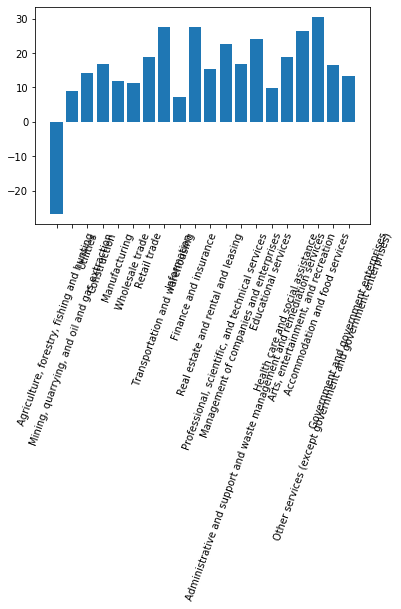

In [46]:
plt.bar(y_axis, values)
plt.xticks(rotation=70)

In [47]:
alaska_df = perc_df.loc[perc_df['State'] == 'Alaska']
alaska_df.head(20)


3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,...,2010 Growth %,2011 Growth %,2012 Growth %,2013 Growth %,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
57,Alaska,"Agriculture, forestry, fishing and hunting",1381,1481,1350,1494,1488,1839,2152,1990,...,23.59,17.02,-7.53,2.31,-2.75,-6.97,-12.11,-3.40,3.96,-20.14
58,Alaska,"Mining, quarrying, and oil and gas extraction",41596,55280,65855,81499,57682,62752,72790,72850,...,8.79,16.00,0.08,-10.56,-13.77,-45.63,-16.84,33.77,9.49,-42.89
59,Alaska,Utilities,1790,2042,2025,2166,2481,2643,2990,2966,...,6.53,13.13,-0.80,1.05,3.74,-2.67,2.51,0.77,4.06,8.54
60,Alaska,Construction,8154,8153,8502,8294,8704,8536,8179,8028,...,-1.93,-4.18,-1.85,-5.03,5.67,5.87,-7.50,-6.93,7.27,3.31
61,Alaska,Manufacturing,5061,5595,6185,5902,5805,4412,3853,3933,...,-24.00,-12.67,2.08,33.82,20.81,14.44,-14.99,7.00,11.36,40.03
64,Alaska,Wholesale trade,3549,3867,4185,4377,4073,4448,4584,4670,...,9.21,3.06,1.88,7.04,0.98,0.81,0.14,1.26,7.44,10.90
65,Alaska,Retail trade,7458,7476,7535,7524,7790,7974,8024,8161,...,2.36,0.63,1.71,2.41,1.70,5.09,0.21,0.54,2.63,10.52
66,Alaska,Transportation and warehousing,13325,14582,16795,19548,17793,21838,20270,21731,...,22.73,-7.18,7.21,1.21,2.25,9.08,6.55,3.68,9.72,35.21
67,Alaska,Information,4258,4304,4460,4647,4388,4485,4598,4678,...,2.21,2.52,1.74,9.62,2.55,10.04,-2.44,-4.18,-2.61,2.75
68,Alaska,Finance and insurance,5183,4583,4384,4222,4154,4072,4154,4494,...,-1.97,2.01,8.18,-0.93,9.82,0.55,-5.70,6.60,1.98,13.21


In [48]:
values = alaska_df['2013 to 2018 Growth %']
y_axis = alaska_df['Industry']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

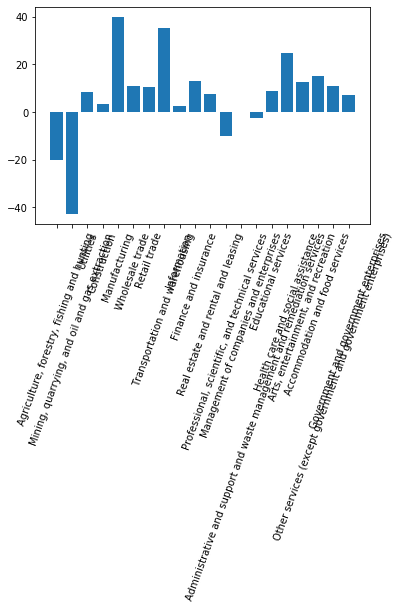

In [49]:
plt.bar(y_axis, values)
plt.xticks(rotation=70)

In [50]:
const_df = perc_df.loc[perc_df['Industry'] == 'Construction']
const_df.head(20)


3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,...,2010 Growth %,2011 Growth %,2012 Growth %,2013 Growth %,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
36,Alabama,Construction,30908,33879,36663,33472,29647,27238,26460,27514,...,-8.13,-2.86,3.98,-2.38,-0.58,1.83,5.74,2.59,6.39,16.86
60,Alaska,Construction,8154,8153,8502,8294,8704,8536,8179,8028,...,-1.93,-4.18,-1.85,-5.03,5.67,5.87,-7.50,-6.93,7.27,3.31
84,Arizona,Construction,73149,86425,88448,71030,47456,39236,38495,37216,...,-17.32,-1.89,-3.32,11.70,4.85,7.01,11.13,13.35,10.73,56.51
108,Arkansas,Construction,17474,18025,18049,17347,16782,16160,16113,17171,...,-3.71,-0.29,6.57,-8.78,1.82,5.86,6.40,5.01,1.70,22.47
132,California,Construction,369122,390697,378605,307508,261471,246429,235645,256002,...,-5.75,-4.38,8.64,13.19,7.78,12.74,8.82,7.48,8.08,53.59
156,Colorado,Construction,52767,55421,57076,54359,45854,37323,37907,40331,...,-18.60,1.56,6.39,22.68,19.07,11.67,9.84,8.41,8.23,71.36
180,Connecticut,Construction,29841,31987,33350,30095,27898,25952,25556,26521,...,-6.98,-1.53,3.78,0.49,3.36,7.54,5.11,1.65,3.21,22.57
204,Delaware,Construction,0,10001,9303,9009,7391,6356,6827,6909,...,-14.00,7.41,1.20,7.40,12.24,14.36,6.26,6.12,3.64,50.00
228,District of Columbia,Construction,0,4210,4212,4374,3982,3839,4378,5436,...,-3.59,14.04,24.17,5.24,2.80,-0.97,-2.54,-100.00,inf,15.00
252,Florida,Construction,221490,242253,228535,176968,135569,134618,132409,116733,...,-0.70,-1.64,-11.84,-5.75,21.27,17.57,16.25,10.69,9.27,100.47


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 <a list of 51 Text xticklabel objects>)

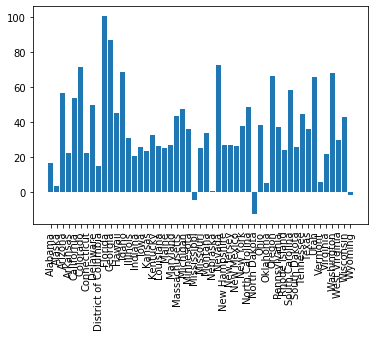

In [51]:
values = const_df['2013 to 2018 Growth %']
y_axis = const_df['State']

plt.bar(y_axis, values)
plt.xticks(rotation=90)

In [52]:
top_5_const_df = const_df.nlargest(5, '2013 to 2018 Growth %')
top_5_const_df

3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,...,2010 Growth %,2011 Growth %,2012 Growth %,2013 Growth %,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
252,Florida,Construction,221490,242253,228535,176968,135569,134618,132409,116733,...,-0.70,-1.64,-11.84,-5.75,21.27,17.57,16.25,10.69,9.27,100.47
276,Georgia,Construction,84500,88350,88094,74469,60441,56979,55286,53856,...,-5.73,-2.97,-2.59,-1.59,18.68,20.08,12.20,7.28,9.06,87.07
708,Nevada,Construction,49944,53675,52838,42734,37147,31281,28320,20946,...,-15.79,-9.47,-26.04,-5.32,7.40,16.79,9.77,12.29,11.68,72.66
156,Colorado,Construction,52767,55421,57076,54359,45854,37323,37907,40331,...,-18.60,1.56,6.39,22.68,19.07,11.67,9.84,8.41,8.23,71.36
324,Idaho,Construction,12501,14809,16397,13825,11228,9733,9402,10076,...,-13.31,-3.40,7.17,20.39,13.30,11.36,11.09,10.22,9.08,68.51


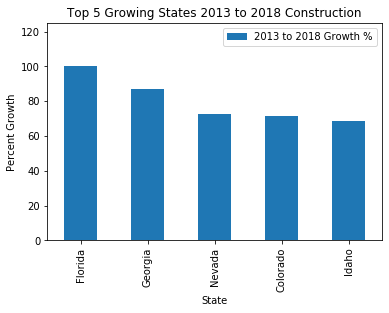

In [115]:
bar_chart = top_5_const_df.plot.bar(x='State', y='2013 to 2018 Growth %')
bar_chart.set_ylabel("Percent Growth")
bar_chart.set_title('Top 5 Growing States 2013 to 2018 Construction')
bar_chart.set_ylim(0,125)

plt.savefig('Const_Top_5.png', bbox_inches = "tight")

In [116]:
worst_5_const_df = const_df.nsmallest(5, '2013 to 2018 Growth %')
worst_5_const_df

3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,...,2010 Growth %,2011 Growth %,2012 Growth %,2013 Growth %,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
852,North Dakota,Construction,4462,4773,5100,5970,7034,7828,9890,12941,...,11.29,26.34,30.85,11.83,12.52,-0.60,-7.36,-15.56,0.03,-12.49
612,Mississippi,Construction,17031,20163,21820,22176,19483,17730,17363,17373,...,-9.00,-2.07,0.06,3.48,-2.69,-4.52,-0.20,-1.21,3.91,-4.82
1236,Wyoming,Construction,5633,6846,8146,8990,7976,7738,7346,8126,...,-2.98,-5.07,10.62,3.17,9.15,-3.88,-9.06,-0.29,3.28,-1.74
684,Nebraska,Construction,12920,13221,14697,14097,15131,14651,14184,13274,...,-3.17,-3.19,-6.42,-0.30,-0.26,1.64,-3.46,-1.44,4.44,0.75
60,Alaska,Construction,8154,8153,8502,8294,8704,8536,8179,8028,...,-1.93,-4.18,-1.85,-5.03,5.67,5.87,-7.50,-6.93,7.27,3.31


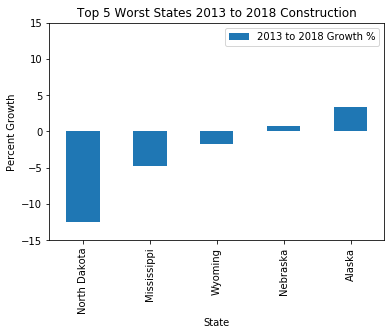

In [117]:
bar_chart = worst_5_const_df.plot.bar(x='State', y='2013 to 2018 Growth %')
bar_chart.set_ylabel("Percent Growth")
bar_chart.set_title('Top 5 Worst States 2013 to 2018 Construction')
bar_chart.set_ylim(-15,15)

plt.savefig('Const_bot_5.png', bbox_inches = "tight")

In [54]:
retail_df = perc_df.loc[perc_df['Industry'] == 'Retail trade']
retail_df.head(20)

3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,...,2010 Growth %,2011 Growth %,2012 Growth %,2013 Growth %,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
41,Alabama,Retail trade,47227,49175,49567,48559,47074,47849,48564,50202,...,1.65,1.49,3.37,2.46,0.90,4.22,4.00,0.87,7.84,18.96
65,Alaska,Retail trade,7458,7476,7535,7524,7790,7974,8024,8161,...,2.36,0.63,1.71,2.41,1.70,5.09,0.21,0.54,2.63,10.52
89,Arizona,Retail trade,74310,81736,83007,76975,71129,72705,78366,80812,...,2.22,7.79,3.12,0.81,5.97,3.08,2.37,3.01,3.89,19.67
113,Arkansas,Retail trade,26209,27090,26719,27392,27030,28318,28576,29908,...,4.77,0.91,4.66,4.28,2.53,4.18,5.11,0.53,1.54,14.61
137,California,Retail trade,485020,505828,493115,461227,438064,455427,464897,488969,...,3.96,2.08,5.18,5.96,2.45,5.45,0.35,3.11,5.94,18.42
161,Colorado,Retail trade,53400,54994,56544,55798,54471,55910,56504,59239,...,2.64,1.06,4.84,4.05,4.21,6.92,4.72,3.03,3.25,24.11
185,Connecticut,Retail trade,47874,46994,46858,45749,45054,45412,46920,49856,...,0.79,3.32,6.26,1.94,1.83,2.53,-0.11,0.48,3.91,8.88
209,Delaware,Retail trade,9565,9838,9883,9468,9248,9405,9605,9897,...,1.70,2.13,3.04,3.63,-0.07,1.90,2.74,0.59,2.84,8.23
233,District of Columbia,Retail trade,4020,4204,4285,4229,4149,4618,4731,4938,...,11.30,2.45,4.38,3.99,6.15,6.97,7.67,2.39,3.02,28.96
257,Florida,Retail trade,221366,232618,228895,218584,207624,214185,216822,227840,...,3.16,1.23,5.08,5.79,4.34,5.34,4.27,2.82,4.19,22.78


In [55]:
top_5_retail_df = retail_df.nlargest(5, '2013 to 2018 Growth %')
top_5_retail_df

3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,...,2010 Growth %,2011 Growth %,2012 Growth %,2013 Growth %,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
1169,Washington,Retail trade,84521,89619,92284,91813,88546,93408,98287,105183,...,5.49,5.22,7.02,8.44,7.57,10.40,12.71,13.53,8.87,65.45
1097,Utah,Retail trade,27513,30460,32323,31308,30358,31081,32569,35777,...,2.38,4.79,9.85,4.16,2.11,8.15,9.80,3.09,4.41,30.51
233,District of Columbia,Retail trade,4020,4204,4285,4229,4149,4618,4731,4938,...,11.30,2.45,4.38,3.99,6.15,6.97,7.67,2.39,3.02,28.96
713,Nevada,Retail trade,34829,36070,35416,33321,30420,31106,32789,33999,...,2.26,5.41,3.69,5.77,4.76,5.31,6.87,1.81,7.19,28.68
929,Oregon,Retail trade,34225,36374,36607,34989,33818,34577,34533,36226,...,2.24,-0.13,4.90,4.94,2.57,6.55,4.96,5.92,4.16,26.54


In [56]:
worst_5_retail_df = retail_df.nsmallest(5, '2013 to 2018 Growth %')
worst_5_retail_df

3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,...,2010 Growth %,2011 Growth %,2012 Growth %,2013 Growth %,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
857,North Dakota,Retail trade,7205,7518,7646,7880,8301,8805,9689,11011,...,6.07,10.04,13.64,8.82,5.64,2.06,-6.67,-1.88,1.49,0.20
737,New Hampshire,Retail trade,21989,22999,21863,22414,22589,23447,22554,22109,...,3.80,-3.81,-1.97,-1.92,-4.75,-1.56,2.74,2.53,3.43,2.16
1241,Wyoming,Retail trade,6247,6859,7506,7911,7731,7259,7601,8046,...,-6.11,4.71,5.85,1.60,0.69,3.98,-0.30,-1.36,1.06,4.05
1193,West Virginia,Retail trade,17013,17511,17492,17194,17437,18158,18488,19174,...,4.13,1.82,3.71,1.86,-2.76,3.07,2.09,0.57,1.92,4.88
905,Oklahoma,Retail trade,31568,33990,34216,34224,34978,36489,37636,40299,...,4.32,3.14,7.08,3.69,1.49,2.38,-1.06,-0.43,3.35,5.79


In [57]:
real_df = perc_df.loc[perc_df['Industry'] == 'Real estate and rental and leasing']
real_df.head(20)

3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,...,2010 Growth %,2011 Growth %,2012 Growth %,2013 Growth %,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
45,Alabama,Real estate and rental and leasing,56634,60538,65515,69224,71194,74396,79334,80637,...,4.50,6.64,1.64,1.17,0.78,5.04,2.89,1.11,4.88,15.50
69,Alaska,Real estate and rental and leasing,12077,12299,13516,14291,15598,17194,18373,18770,...,10.23,6.86,2.16,2.84,1.48,1.40,3.86,-3.10,4.01,7.72
93,Arizona,Real estate and rental and leasing,134378,150574,157546,160249,154316,147616,147458,153934,...,-4.34,-0.11,4.39,7.08,3.91,6.55,6.70,4.72,6.25,31.44
117,Arkansas,Real estate and rental and leasing,30862,32671,35881,36843,38887,40875,43214,46234,...,5.11,5.72,6.99,0.76,1.45,6.78,-0.27,1.05,5.15,14.78
141,California,Real estate and rental and leasing,1133703,1207906,1262785,1304660,1270255,1286493,1348739,1406008,...,1.28,4.84,4.25,6.61,6.90,6.39,5.28,6.73,5.25,34.49
165,Colorado,Real estate and rental and leasing,118014,122809,133892,139342,136647,142274,150752,154140,...,4.12,5.96,2.25,3.41,3.54,8.76,8.43,7.42,5.59,38.50
189,Connecticut,Real estate and rental and leasing,114128,111591,120662,141232,153341,155292,154983,147966,...,1.27,-0.20,-4.53,-2.52,-2.13,1.24,4.00,1.98,5.63,11.00
213,Delaware,Real estate and rental and leasing,26446,26989,27939,37125,37264,35501,37957,38310,...,-4.73,6.92,0.93,3.47,-3.17,9.41,-3.39,-0.32,4.55,6.66
237,District of Columbia,Real estate and rental and leasing,25623,27338,29002,30294,30560,32967,35503,38384,...,7.88,7.69,8.11,4.43,9.67,3.17,2.61,3.27,3.81,24.45
261,Florida,Real estate and rental and leasing,460968,494205,513957,511669,494239,479246,482155,499108,...,-3.03,0.61,3.52,4.79,4.04,8.45,5.76,5.20,5.10,31.95


In [58]:
top_5_real_df = real_df.nlargest(5, '2013 to 2018 Growth %')
top_5_real_df

3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,...,2010 Growth %,2011 Growth %,2012 Growth %,2013 Growth %,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
933,Oregon,Real estate and rental and leasing,77780,86030,94074,97976,98718,98031,99852,99995,...,-0.70,1.86,0.14,3.64,5.12,10.55,10.32,10.33,5.79,49.62
1101,Utah,Real estate and rental and leasing,41908,47662,54387,56581,55950,57543,60609,64011,...,2.85,5.33,5.61,4.41,5.02,7.31,10.83,9.93,6.18,45.81
429,Kansas,Real estate and rental and leasing,38666,39695,43689,53824,56760,56218,58108,59347,...,-0.95,3.36,2.13,-5.02,10.50,11.89,9.63,-0.18,6.06,43.49
1173,Washington,Real estate and rental and leasing,154187,164204,184190,193925,195047,195850,202536,207846,...,0.41,3.41,2.62,6.29,7.00,6.78,6.91,8.12,6.36,40.47
165,Colorado,Real estate and rental and leasing,118014,122809,133892,139342,136647,142274,150752,154140,...,4.12,5.96,2.25,3.41,3.54,8.76,8.43,7.42,5.59,38.50


In [59]:
worst_5_real_df = real_df.nsmallest(5, '2013 to 2018 Growth %')
worst_5_real_df

3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,...,2010 Growth %,2011 Growth %,2012 Growth %,2013 Growth %,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
981,Rhode Island,Real estate and rental and leasing,29039,28865,29730,28699,30810,31748,32537,32814,...,3.04,2.49,0.85,1.00,-1.89,2.24,1.15,-1.08,4.60,4.98
213,Delaware,Real estate and rental and leasing,26446,26989,27939,37125,37264,35501,37957,38310,...,-4.73,6.92,0.93,3.47,-3.17,9.41,-3.39,-0.32,4.55,6.66
69,Alaska,Real estate and rental and leasing,12077,12299,13516,14291,15598,17194,18373,18770,...,10.23,6.86,2.16,2.84,1.48,1.40,3.86,-3.10,4.01,7.72
765,New Jersey,Real estate and rental and leasing,286633,305411,321003,328196,334081,342433,350455,360895,...,2.50,2.34,2.98,2.01,0.11,3.51,2.44,-2.17,4.48,8.50
909,Oklahoma,Real estate and rental and leasing,46470,51354,56025,56470,56154,59109,62713,68265,...,5.26,6.10,8.85,0.98,1.57,3.01,-1.57,1.35,5.15,9.74


In [60]:
education_df = perc_df.loc[perc_df['Industry'] == 'Educational services']
education_df.head(20)

3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,...,2010 Growth %,2011 Growth %,2012 Growth %,2013 Growth %,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
49,Alabama,Educational services,3076,3298,3627,3771,4302,4551,4680,4790,...,5.79,2.83,2.35,1.80,4.72,4.00,4.58,-4.66,1.28,9.97
73,Alaska,Educational services,527,554,568,589,631,683,700,725,...,8.24,2.49,3.57,4.00,-1.19,2.42,2.23,2.69,2.50,8.89
97,Arizona,Educational services,7410,8006,8663,10089,11885,13324,13911,14737,...,12.11,4.41,5.94,-2.21,3.07,3.67,1.64,-0.20,-0.62,7.71
121,Arkansas,Educational services,1634,1798,1901,2107,2473,2668,2801,2857,...,7.89,4.99,2.00,5.81,1.98,0.58,6.42,-1.64,3.33,10.95
145,California,Educational services,59470,64604,67993,76400,86092,92519,97087,101870,...,7.47,4.94,4.93,2.46,6.25,4.31,4.11,1.44,4.09,21.83
169,Colorado,Educational services,6294,6817,7190,7970,8834,9626,9824,10409,...,8.97,2.06,5.95,3.27,5.01,3.06,5.46,0.37,4.56,19.78
193,Connecticut,Educational services,13054,14024,15043,16882,19170,20145,20651,21576,...,5.09,2.51,4.48,2.05,4.64,2.11,2.62,1.34,5.12,16.80
217,Delaware,Educational services,1189,1334,1367,1459,1592,1612,1625,1724,...,1.26,0.81,6.09,0.52,7.96,-2.51,0.44,-2.24,0.73,4.10
241,District of Columbia,Educational services,10487,11023,11411,12710,14283,14731,15206,15463,...,3.14,3.22,1.69,8.72,4.54,3.76,3.81,-1.83,3.09,13.96
265,Florida,Educational services,22427,24634,26937,30253,33284,35521,37468,37584,...,6.72,5.48,0.31,1.53,3.88,2.68,3.80,-2.00,2.08,10.76


In [61]:
top_5_education_df = education_df.nlargest(5, '2013 to 2018 Growth %')
top_5_education_df

3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,...,2010 Growth %,2011 Growth %,2012 Growth %,2013 Growth %,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
1105,Utah,Educational services,4432,4946,5337,5947,6560,7022,7325,7620,...,7.04,4.32,4.03,4.24,4.85,5.98,8.44,1.06,10.71,34.81
841,North Carolina,Educational services,13671,15411,16734,18843,21773,22912,23859,24692,...,5.23,4.13,3.49,-8.76,22.05,2.51,3.02,-3.58,6.40,32.23
1129,Vermont,Educational services,2209,2320,2408,2656,2882,2889,2978,3042,...,0.24,3.08,2.15,1.48,2.17,3.17,18.01,2.11,0.89,28.15
817,New York,Educational services,69466,74084,77912,86211,95981,100350,104071,109974,...,4.55,3.71,5.67,2.40,4.05,10.78,5.14,1.20,3.75,27.24
1081,Texas,Educational services,23669,25059,26680,29904,34418,37191,39035,40637,...,8.06,4.96,4.10,3.29,4.34,6.44,7.12,1.30,2.87,23.97


In [62]:
worst_5_education_df = education_df.nsmallest(5, '2013 to 2018 Growth %')
worst_5_education_df

3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,...,2010 Growth %,2011 Growth %,2012 Growth %,2013 Growth %,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
625,Mississippi,Educational services,2094,2357,2462,2752,3068,3328,3465,3709,...,8.47,4.12,7.04,0.38,1.96,-4.40,1.76,-1.52,1.46,-0.89
793,New Mexico,Educational services,1623,1682,1767,1974,2146,2274,2278,2324,...,5.96,0.18,2.02,-2.45,-0.26,-0.44,5.02,-5.67,0.81,-0.84
217,Delaware,Educational services,1189,1334,1367,1459,1592,1612,1625,1724,...,1.26,0.81,6.09,0.52,7.96,-2.51,0.44,-2.24,0.73,4.10
1033,South Dakota,Educational services,905,941,927,1049,1156,1286,1294,1324,...,11.25,0.62,2.32,-1.59,1.30,3.18,2.94,-3.07,-0.15,4.14
313,Hawaii,Educational services,2462,2602,2736,3071,3377,3485,3572,3723,...,3.20,2.50,4.23,-1.02,-0.19,0.22,2.22,-2.42,6.09,5.86


In [63]:
govt_df = perc_df.loc[perc_df['Industry'] == 'Government and government enterprises']
govt_df.head(20)

3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,...,2010 Growth %,2011 Growth %,2012 Growth %,2013 Growth %,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
54,Alabama,Government and government enterprises,100372,104836,113430,117539,123486,125976,128211,128072,...,2.02,1.77,-0.11,0.66,2.57,2.97,1.71,2.45,3.08,13.44
78,Alaska,Government and government enterprises,30209,31642,32929,34214,36185,37308,39360,40997,...,3.10,5.50,4.16,-1.52,2.47,0.65,0.24,0.82,2.91,7.27
102,Arizona,Government and government enterprises,118952,127301,135239,142981,140179,145933,148071,151283,...,4.10,1.47,2.17,2.23,-0.01,1.97,2.75,3.65,4.03,12.96
126,Arkansas,Government and government enterprises,47043,50024,51809,53639,55604,57581,58924,59736,...,3.56,2.33,1.38,2.74,1.18,0.77,1.17,0.95,2.39,6.62
150,California,Government and government enterprises,859084,904825,969547,1018035,1017920,1030718,1052515,1055771,...,1.26,2.11,0.31,3.89,5.57,5.65,3.53,3.52,3.99,24.31
174,Colorado,Government and government enterprises,113445,115908,118707,127344,131473,135597,136696,138727,...,3.14,0.81,1.49,2.77,4.47,6.24,3.06,3.87,4.42,24.06
198,Connecticut,Government and government enterprises,83995,87120,92428,96656,94584,96133,97187,97002,...,1.64,1.10,-0.19,3.29,2.59,4.20,0.54,1.03,2.34,11.11
222,Delaware,Government and government enterprises,20430,20644,22285,23493,24721,24696,25366,25434,...,-0.10,2.71,0.27,1.16,-0.97,3.58,2.06,3.05,3.10,11.23
246,District of Columbia,Government and government enterprises,120620,122227,126069,133771,142878,153551,157639,157629,...,7.47,2.66,-0.01,0.45,2.72,2.32,3.66,2.79,4.46,16.99
270,Florida,Government and government enterprises,313024,328288,371766,382117,392093,400237,394876,400644,...,2.08,-1.34,1.46,1.72,1.16,1.30,2.32,2.89,3.48,11.64


In [64]:
top_5_govt_df = govt_df.nlargest(5, '2013 to 2018 Growth %')
top_5_govt_df

3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,...,2010 Growth %,2011 Growth %,2012 Growth %,2013 Growth %,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
870,North Dakota,Government and government enterprises,15202,16043,16417,15817,17894,19530,19931,20246,...,9.14,2.05,1.58,-2.10,7.23,9.41,1.32,3.16,3.17,26.51
1038,South Dakota,Government and government enterprises,15545,16223,16586,17341,18197,19403,19632,19445,...,6.63,1.18,-0.95,-2.85,4.04,3.54,4.54,6.70,4.40,25.44
150,California,Government and government enterprises,859084,904825,969547,1018035,1017920,1030718,1052515,1055771,...,1.26,2.11,0.31,3.89,5.57,5.65,3.53,3.52,3.99,24.31
174,Colorado,Government and government enterprises,113445,115908,118707,127344,131473,135597,136696,138727,...,3.14,0.81,1.49,2.77,4.47,6.24,3.06,3.87,4.42,24.06
1110,Utah,Government and government enterprises,54524,58108,60809,64302,65480,67629,70136,69721,...,3.28,3.71,-0.59,1.40,4.29,3.40,4.90,4.13,4.39,22.96


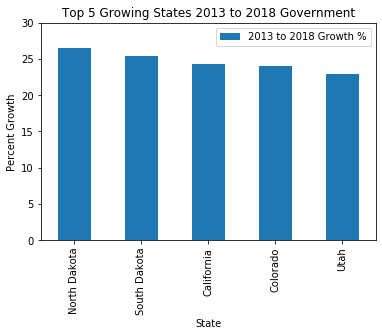

In [65]:
bar_chart = top_5_govt_df.plot.bar(x='State', y='2013 to 2018 Growth %')
bar_chart.set_ylabel("Percent Growth")
bar_chart.set_title('Top 5 Growing States 2013 to 2018 Government')
bar_chart.set_ylim(0,30)

plt.savefig('Govt_Top_5.png', bbox_inches = "tight")

bar_chart = top_5_govt_df.plot.bar(x='State', y='2013 to 2018 Growth %')
bar_chart.set_xlabel("Percentage Of 2018 GDP")
bar_chart.set_title('2018 Industry Size USA GDP')

plt.savefig('Industry_Size_GDP.png', bbox_inches = "tight")

In [66]:
worst_5_govt_df = govt_df.nsmallest(5, '2013 to 2018 Growth %')
worst_5_govt_df

3,State,Industry,2005,2006,2007,2008,2009,2010,2011,2012,...,2010 Growth %,2011 Growth %,2012 Growth %,2013 Growth %,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
1206,West Virginia,Government and government enterprises,36543,37718,39219,40742,42871,43708,44510,45960,...,1.95,1.83,3.26,1.09,-1.28,1.97,-0.15,0.84,2.35,3.73
462,Kentucky,Government and government enterprises,81527,87382,92209,98804,99027,105542,105376,106776,...,6.58,-0.16,1.33,1.52,0.46,0.28,0.02,1.20,1.82,3.83
366,Illinois,Government and government enterprises,250745,260065,266559,275837,284623,298567,297283,299585,...,4.90,-0.43,0.77,3.70,1.06,0.83,-0.36,2.03,2.71,6.40
126,Arkansas,Government and government enterprises,47043,50024,51809,53639,55604,57581,58924,59736,...,3.56,2.33,1.38,2.74,1.18,0.77,1.17,0.95,2.39,6.62
1254,Wyoming,Government and government enterprises,15147,16148,17988,19444,20252,20905,21195,22150,...,3.22,1.39,4.51,6.15,2.76,1.15,0.87,0.71,1.39,7.06


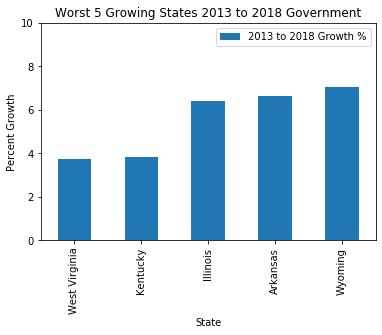

In [67]:
bar_chart = worst_5_govt_df.plot.bar(x='State', y='2013 to 2018 Growth %')
bar_chart.set_ylabel("Percent Growth")
bar_chart.set_title('Worst 5 Growing States 2013 to 2018 Government')
bar_chart.set_ylim(0,10)

plt.savefig('Govt_Worst_5.png', bbox_inches = "tight")

In [68]:
pop_gdp = pd.read_csv("POPGDPMerged.csv")
pop_gdp.head()

,Unnamed: 0,Unnamed: 0_x,State,Industry,2005 GDP,2006 GDP,2007 GDP,2008 GDP,2009 GDP,2010 GDP,...,2017,2018,2019,GP 2014,GP 2015,GP 2016,GP 2017,GP 2018,GP 2019,Total Growth
0,0,1,Alabama,"Agriculture, forestry, fishing and hunting",10522,8399,7777,7580,7664,7713,...,4874747,4887871,4903185,1.14,0.52,0.09,0.24,0.27,0.31,2.58
1,1,2,Alabama,"Mining, quarrying, and oil and gas extraction",10988,11581,13728,15396,11279,12138,...,4874747,4887871,4903185,1.14,0.52,0.09,0.24,0.27,0.31,2.58
2,2,3,Alabama,Utilities,15296,17515,18298,18877,20210,22336,...,4874747,4887871,4903185,1.14,0.52,0.09,0.24,0.27,0.31,2.58
3,3,4,Alabama,Construction,30908,33879,36663,33472,29647,27238,...,4874747,4887871,4903185,1.14,0.52,0.09,0.24,0.27,0.31,2.58
4,4,5,Alabama,Manufacturing,112032,118053,116161,116017,101003,109693,...,4874747,4887871,4903185,1.14,0.52,0.09,0.24,0.27,0.31,2.58


In [69]:
pop_gdp_df = pop_gdp.drop(columns=['Unnamed: 0','Unnamed: 0_x'])
pop_gdp_df.head()

,State,Industry,2005 GDP,2006 GDP,2007 GDP,2008 GDP,2009 GDP,2010 GDP,2011 GDP,2012 GDP,...,2017,2018,2019,GP 2014,GP 2015,GP 2016,GP 2017,GP 2018,GP 2019,Total Growth
0,Alabama,"Agriculture, forestry, fishing and hunting",10522,8399,7777,7580,7664,7713,6364,7209,...,4874747,4887871,4903185,1.14,0.52,0.09,0.24,0.27,0.31,2.58
1,Alabama,"Mining, quarrying, and oil and gas extraction",10988,11581,13728,15396,11279,12138,11798,11567,...,4874747,4887871,4903185,1.14,0.52,0.09,0.24,0.27,0.31,2.58
2,Alabama,Utilities,15296,17515,18298,18877,20210,22336,23283,22757,...,4874747,4887871,4903185,1.14,0.52,0.09,0.24,0.27,0.31,2.58
3,Alabama,Construction,30908,33879,36663,33472,29647,27238,26460,27514,...,4874747,4887871,4903185,1.14,0.52,0.09,0.24,0.27,0.31,2.58
4,Alabama,Manufacturing,112032,118053,116161,116017,101003,109693,125126,127687,...,4874747,4887871,4903185,1.14,0.52,0.09,0.24,0.27,0.31,2.58


In [70]:
pop_gdp_change = pop_gdp_df.drop(columns=['2005 GDP','2006 GDP', '2007 GDP', '2008 GDP', '2009 GDP'])
pop_gdp_change.head()



,State,Industry,2010 GDP,2011 GDP,2012 GDP,2013 GDP,2014 GDP,2015 GDP,2016 GDP,2017 GDP,...,2017,2018,2019,GP 2014,GP 2015,GP 2016,GP 2017,GP 2018,GP 2019,Total Growth
0,Alabama,"Agriculture, forestry, fishing and hunting",7713,6364,7209,12455,10075,10244,7916,9234,...,4874747,4887871,4903185,1.14,0.52,0.09,0.24,0.27,0.31,2.58
1,Alabama,"Mining, quarrying, and oil and gas extraction",12138,11798,11567,11042,10100,9668,6899,11136,...,4874747,4887871,4903185,1.14,0.52,0.09,0.24,0.27,0.31,2.58
2,Alabama,Utilities,22336,23283,22757,22721,23444,24011,24801,24618,...,4874747,4887871,4903185,1.14,0.52,0.09,0.24,0.27,0.31,2.58
3,Alabama,Construction,27238,26460,27514,26858,26703,27193,28754,29500,...,4874747,4887871,4903185,1.14,0.52,0.09,0.24,0.27,0.31,2.58
4,Alabama,Manufacturing,109693,125126,127687,134471,133129,133478,137380,141562,...,4874747,4887871,4903185,1.14,0.52,0.09,0.24,0.27,0.31,2.58


In [71]:
data_2010_total = pop_gdp_change.groupby("State")["2010 GDP"].sum()

In [72]:
data_2011_total = pop_gdp_change.groupby("State")["2011 GDP"].sum()

In [73]:
data_2012_total = pop_gdp_change.groupby("State")["2012 GDP"].sum()

In [74]:
data_2013_total = pop_gdp_change.groupby("State")["2013 GDP"].sum()

In [75]:
data_2014_total = pop_gdp_change.groupby("State")["2014 GDP"].sum()

In [76]:
data_2015_total = pop_gdp_change.groupby("State")["2015 GDP"].sum()

In [77]:
data_2016_total = pop_gdp_change.groupby("State")["2016 GDP"].sum()

In [78]:
data_2017_total = pop_gdp_change.groupby("State")["2017 GDP"].sum()

In [102]:
data_2018_total = pop_gdp_change.groupby("State")["2018 GDP"].sum()

State
Alabama                   886941
Alaska                    218936
Arizona                  1393189
Arkansas                  513676
California              11990933
Colorado                 1487001
Connecticut              1102906
Delaware                  291561
District of Columbia      562646
Florida                  4156947
Georgia                  2368613
Hawaii                    375192
Idaho                     308210
Illinois                 3461242
Indiana                  1467201
Iowa                      758807
Kansas                    673271
Kentucky                  832351
Louisiana                1029151
Maine                     259424
Maryland                 1650337
Massachusetts            2277951
Michigan                 2108383
Minnesota                1475408
Mississippi               459334
Missouri                 1275684
Montana                   201307
Nebraska                  495915
Nevada                    677241
New Hampshire             337855
New 

In [104]:
data_all_2018_total = pop_gdp_change["2018 GDP"].sum()

In [93]:
data_all_2018_total = pop_gdp_change["2018 GDP"].sum()

In [94]:
data_all_2017_total = pop_gdp_change["2017 GDP"].sum()

In [95]:
data_all_2016_total = pop_gdp_change["2016 GDP"].sum()

In [96]:
data_all_2015_total = pop_gdp_change["2015 GDP"].sum()

In [97]:
data_all_2014_total = pop_gdp_change["2014 GDP"].sum()

In [98]:
data_all_2013_total = pop_gdp_change['2013 GDP'].sum()

In [105]:
all_state_data = pd.concat([data_all_2013_total, data_all_2014_total, data_all_2015_total, data_all_2016_total, data_all_2017_total, data_all_2018_total], axis=1, ignore_index=False)
all_state_data

TypeError: cannot concatenate object of type '<class 'numpy.int64'>'; only Series and DataFrame objs are valid

In [106]:
frames = [data_2010_total, data_2011_total, data_2012_total, data_2013_total, data_2014_total, data_2015_total, data_2016_total, data_2017_total, data_2018_total]


In [81]:
state_sum_data = pd.concat([data_2013_total, data_2014_total, data_2015_total, data_2016_total, data_2017_total, data_2018_total], axis=1, ignore_index=False)
state_sum_data

,2013 GDP,2014 GDP,2015 GDP,2016 GDP,2017 GDP,2018 GDP
State,,,,,,
Alabama,765926,776846,801610,815319,841459,886941
Alaska,226490,222094,202566,197452,207212,218936
Arizona,1100796,1137718,1188565,1244362,1309981,1393189
Arkansas,457006,469347,475047,481499,493533,513676
California,9051084,9580647,10215088,10631187,11276446,11990933
Colorado,1153221,1226284,1274221,1317474,1400016,1487001
Connecticut,986527,995462,1040289,1054784,1073241,1102906
Delaware,240329,264975,281966,276390,280642,291561
District of Columbia,459565,479364,500848,519306,528588,562646


In [82]:
def growth_perc(x,y):
    growth = (y-x)/x
    growth = growth*100
    growth = growth.round(2)
    return growth

def total_growth(a,b):
    tot_growth = (b-a)/a
    tot_growth = tot_growth*100
    tot_growth = tot_growth.round(2)
    return tot_growth

In [83]:
state_sum_data['2014 Growth %'] = growth_perc(state_sum_data['2013 GDP'],state_sum_data['2014 GDP'])
state_sum_data['2015 Growth %'] = growth_perc(state_sum_data['2014 GDP'],state_sum_data['2015 GDP'])
state_sum_data['2016 Growth %'] = growth_perc(state_sum_data['2015 GDP'],state_sum_data['2016 GDP'])
state_sum_data['2017 Growth %'] = growth_perc(state_sum_data['2016 GDP'],state_sum_data['2017 GDP'])
state_sum_data['2018 Growth %'] = growth_perc(state_sum_data['2017 GDP'],state_sum_data['2018 GDP'])
state_sum_data['2013 to 2018 Growth %'] = total_growth(state_sum_data['2013 GDP'],state_sum_data['2018 GDP'])

In [84]:
state_sum_data_edit = state_sum_data
state_sum_data_edit

,2013 GDP,2014 GDP,2015 GDP,2016 GDP,2017 GDP,2018 GDP,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
State,,,,,,,,,,,,
Alabama,765926,776846,801610,815319,841459,886941,1.43,3.19,1.71,3.21,5.41,15.80
Alaska,226490,222094,202566,197452,207212,218936,-1.94,-8.79,-2.52,4.94,5.66,-3.34
Arizona,1100796,1137718,1188565,1244362,1309981,1393189,3.35,4.47,4.69,5.27,6.35,26.56
Arkansas,457006,469347,475047,481499,493533,513676,2.70,1.21,1.36,2.50,4.08,12.40
California,9051084,9580647,10215088,10631187,11276446,11990933,5.85,6.62,4.07,6.07,6.34,32.48
Colorado,1153221,1226284,1274221,1317474,1400016,1487001,6.34,3.91,3.39,6.27,6.21,28.94
Connecticut,986527,995462,1040289,1054784,1073241,1102906,0.91,4.50,1.39,1.75,2.76,11.80
Delaware,240329,264975,281966,276390,280642,291561,10.26,6.41,-1.98,1.54,3.89,21.32
District of Columbia,459565,479364,500848,519306,528588,562646,4.31,4.48,3.69,1.79,6.44,22.43


In [85]:
ordered_econ = state_sum_data_edit.sort_values(by='2013 to 2018 Growth %', ascending=False)
ordered_econ

,2013 GDP,2014 GDP,2015 GDP,2016 GDP,2017 GDP,2018 GDP,2014 Growth %,2015 Growth %,2016 Growth %,2017 Growth %,2018 Growth %,2013 to 2018 Growth %
State,,,,,,,,,,,,
Washington,1677379,1768806,1881317,1965434,2099258,2263326,5.45,6.36,4.47,6.81,7.82,34.93
Oregon,717531,755521,812637,860203,906475,959133,5.29,7.56,5.85,5.38,5.81,33.67
Utah,537007,565040,597486,631534,669018,712550,5.22,5.74,5.70,5.94,6.51,32.69
California,9051084,9580647,10215088,10631187,11276446,11990933,5.85,6.62,4.07,6.07,6.34,32.48
Florida,3202819,3357936,3580588,3755097,3942663,4156947,4.84,6.63,4.87,4.99,5.44,29.79
Nevada,522485,540614,576930,604859,635392,677241,3.47,6.72,4.84,5.05,6.59,29.62
Colorado,1153221,1226284,1274221,1317474,1400016,1487001,6.34,3.91,3.39,6.27,6.21,28.94
Georgia,1842342,1943264,2054264,2158100,2265894,2368613,5.48,5.71,5.05,4.99,4.53,28.57
South Carolina,732059,767751,815685,851950,892444,935718,4.88,6.24,4.45,4.75,4.85,27.82
